In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
import csv
import os
import pandas as pd
import numpy as np
# os.getcwd() # os.listdir()

In [68]:
# read data file - Mark's xsheet saved as csv
input_file1 = 'WorkingFileWomenForMICE_26.5.21.csv'
input_file2 = 'ReportColumns.csv'
output_file = 'ActiveIronClean.csv'
data = pd.read_csv(f'/home/barnyard/0python/solvitron/{input_file1}')[:-1]
print('Reading data :',input_file1)
# read file noting required variables
report_cols = pd.read_csv(f'/home/barnyard/0python/solvitron/{input_file2}',header=None, na_values=[''])
print('Reading var list :',input_file2)
report_cols.columns = ['required', 'variable']
# list required variables
list_cols = report_cols['variable'][report_cols['required']=='report']
data = data[list_cols]

Reading data : WorkingFileWomenForMICE_26.5.21.csv
Reading var list : ReportColumns.csv


In [69]:


# subset dataset for required variables only
print('Cleaning data...')
# convert columns to categories and lowercase
data = data.applymap(lambda x: x.lower() if isinstance(x, str) else x)
# is -999 a placeholder for N/A for variables TempV3	SBPV3	DBPV3	HRV3	WgtV3	BMIV3	IronV3	UIBCV3	TIBCV3	TSATV3	FerritinV3	WCCV3	RCCV3	HbV3	HCTV3	MCVV3	MCHV3	MCHCV3	RDWV3	PlatV3	NeutV3	LymphV3	MonoV3	EosinoV3	BasoV3
# replace -999 values with Null
data[data==-999] = np.nan
# is 0 a valid value for variables 9SFFulloflifeV2,9SFEnergyV2,9SFWornOutV2,9SFTiredV2 x 3
#data[data==0] = np.nan
# 'AlcoholUnitsPerWeek' column : replace Null values with 0
data['AlcoholUnitsPerWeek'].replace(to_replace=np.nan, value=0, inplace=True)
data.to_csv(f'~/0python/solvitron/{output_file}', index=False, na_rep='NA')
data.to_csv(f'~/rstudio/scripts/solvitron/{output_file}', index=False, na_rep='NA')
print('Writing cleaned data :',output_file)
category_cols = data.select_dtypes(exclude=[np.number]).columns.astype('category').to_list()
print('Categorical Variables :',category_cols)

Cleaning data...
Writing cleaned data : ActiveIronClean.csv
Categorical Variables : ['Ethnicity', 'SmokingCurrent', '9SFFulloflifeV2', 'SelfRepHMPV2', 'HMPLength', 'HMPsoakthrough', 'HMPdoubleprotection', 'HMPLargeClots', 'HMPInterfereReglifestyle', 'HMPPeriodPain', 'HMPEasyBruising', 'HMPMedications']


In [70]:
# shape of dataframe
data_cols = len(data.columns)
data_rows = len(data)
print('Dataset :: Variables #',data_cols,'Observations #',data_rows)
all_missing = data.isna().sum().sum()
var_missing = data.isna().sum()
var_missing = var_missing[var_missing>0]
print('Total missing values #',all_missing,'in',len(var_missing),'variables')
# check for duplicate (mispelled) categorical labels
print('\nCheck for duplicate (mispelled) categorical labels')
for col in data[category_cols]:
    print(col,data[col].unique())

Dataset :: Variables # 138 Observations # 59
Total missing values # 1037 in 86 variables

Check for duplicate (mispelled) categorical labels
Ethnicity ['caucasian' 'black']
SmokingCurrent ['non-smoker' 'current smoker' 'past smoker']
9SFFulloflifeV2 ['75' '25' '100' '50' '0']
SelfRepHMPV2 ['yes' 'no' nan]
HMPLength ['less than 3 days' '3 to 7 days' 'more than 8 days' nan]
HMPsoakthrough ['no' 'yes' nan]
HMPdoubleprotection ['no' 'yes' nan]
HMPLargeClots ['no' 'yes' nan]
HMPInterfereReglifestyle ['no' 'yes' nan]
HMPPeriodPain ['yes' 'no' nan]
HMPEasyBruising ['yes' 'no' nan]
HMPMedications ['no' 'yes' nan]


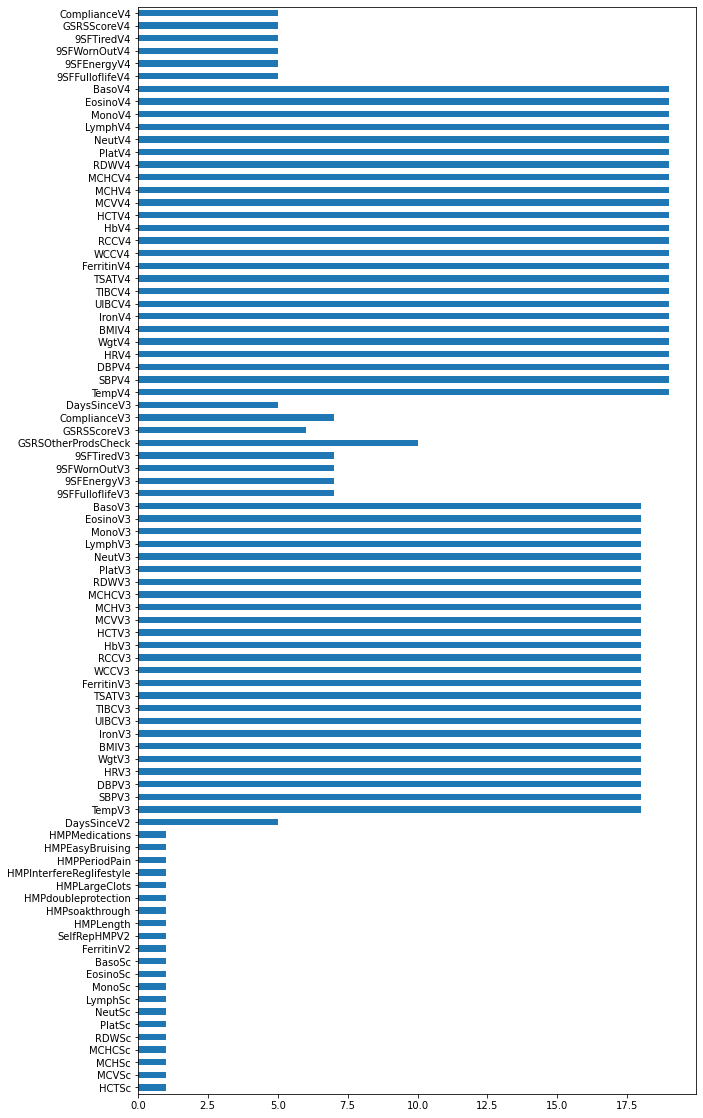

In [421]:
# plot hist for values missing > 5%
plot_missing = var_missing[var_missing/data_cols*100>0]
labels = plot_missing.keys().tolist()
plt.figure(figsize=(10,20))
var_missing.plot(kind="barh")
plt.savefig(os.path.join('Missing_Variables_Histogram.png'), dpi=300, format='png', bbox_inches='tight')

<AxesSubplot:>

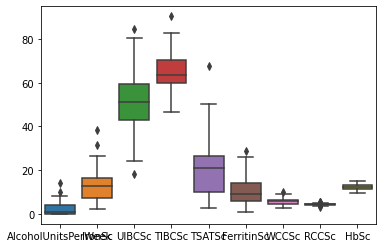

In [510]:
#data.dtypes
# subset numerical columns only
data_boxplot = data.drop(char_cols, axis=1).iloc[:, 2:11]
sns.boxplot(data=data_boxplot)

In [65]:
input_file3 = 'complete1.csv'
data = pd.read_csv(f'/home/barnyard/0python/solvitron/{input_file3}')[:-1]
v2 = [col for col in data.columns if 'V2' in col]
v3 = [col for col in data.columns if 'V3' in col]
v4 = [col for col in data.columns if 'V4' in col]
vars = [string.replace('V2','') for string in data[v2].columns]
vars[0:len(vars)]
for i in range(0,len(vars)):
    #print(i, vars[i])
    Temp = [data[v2].iloc[:, 0],data[v3].iloc[:, 0],data[v4].iloc[:, 0]]
    SBP = [data[v2].iloc[:, 0],data[v3].iloc[:, 0],data[v4].iloc[:, 0]]
    DBP = [data[v2].iloc[:, 0],data[v3].iloc[:, 0],data[v4].iloc[:, 0]]
    HR = [data[v2].iloc[:, 0],data[v3].iloc[:, 0],data[v4].iloc[:, 0]]
    Wgt = [data[v2].iloc[:, 0],data[v3].iloc[:, 0],data[v4].iloc[:, 0]]
Temp[1][0:10]

0    36.1
1    36.5
2    36.1
3    37.5
4    36.2
5    36.1
6    37.6
7    36.0
8    36.4
9    37.4
Name: TempV3, dtype: float64

In [ ]:
Wgt
Temp